In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
cd '/content/gdrive/My Drive/미니프로젝트'

/content/gdrive/.shortcut-targets-by-id/1VOm1kx8UFvcX65eqxWHO10iSX_m5fda1/미니프로젝트


In [3]:
ls

 코드/                  Comments_data.csv
 데이터/                Comments_data.gsheet
'best_model (1).h5'    '악플분류코드(랜덤포레스트).ipynb'
 best_model.h5         'LSTM 결과.txt'
 best_model_raw_v2.h5   model.png
 best_model_v2.h5       ngrok-stable-linux-amd64.zip
 best_model_v3.h5       tb_logs/


In [4]:
import pandas as pd 

In [5]:
df = pd.read_csv('Comments_data.csv')
df = df.iloc[:, 1:3]
df = df.dropna()

In [6]:
good = df.loc[df['Label'].isin([0])]
poss = df.loc[df['Label'].isin([1])]
bad = df.loc[df['Label'].isin([2])]

In [7]:
print(f'선플 데이터 길이: {len(good)}')
print(f'악플 가능성 데이터 길이: {len(poss)}')
print(f'악플 데이터 길이: {len(bad)}')

선플 데이터 길이: 64311
악플 가능성 데이터 길이: 2560
악플 데이터 길이: 1520


In [23]:
a = pd.concat([poss, poss, poss, poss, poss], ignore_index=True)
a

Comment  Label
0                                         뚱땡이 이대호 함 치 봐라    1.0
1         좃크보는 너클볼을 받아줄 수 있는 포수가 없으니 너클볼 전문 투수는 나올수가 없을듯    1.0
2                   아 시부레 너클볼에 혀 잘렸대서 헐레벌떡 뛰어왔는데 허 찔린 거네    1.0
3                     눈으로도 못칠거같은데 실제몸으로 치는 선수들은 얼마나 ㅈ같을까    1.0
4                                          2:27  이기중 개새끼    1.0
...                                                  ...    ...
12795  공만이 정말 노력하는것같기는한데 매번 선넘어서 시청자 눈살찌푸리게하고 전에 감스트눈...    1.0
12796                     난 노공만 태도가 너무 억지고 노잼이라서 별루냐왜...    1.0
12797   노잼만 또 또 오버해서 불닭소스 저따구로 넣네 저게 사람 죽으라는거지 먹으라는거냐 ㅋㅋ    1.0
12798                                              살왜케쪗냐    1.0
12799                                       노공만 너무 까부네ㅋㅋ    1.0

[12800 rows x 2 columns]

In [24]:
b = pd.concat([bad, bad, bad, bad, bad, bad, bad, bad, bad, bad], ignore_index=True)
b

Comment  Label
0      와 정근우 타석 저건 심판이 사람새끼냐ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ시발 자질이 없는 수준이 ...    2.0
1                                          멍청한 김성근이 망친거임    2.0
2                                             김성근 씹쌔끼 아오    2.0
3                                     김성근 얼굴에 염산테러 하고 싶다    2.0
4                              송창식이 뭘 잘못 했는데?\n세이콘 씨발새끼야    2.0
...                                                  ...    ...
15195                      이새끼 살 디룩디룩쪄서 옛날 면상으로 돌아왓네ㅋㅋㅋㅋ    2.0
15196                                       옆에 안경년 좆노잼이네    2.0
15197                                     진행하는ㅅㄲ 왜케 ㅂㅅ이냐    2.0
15198                                        매니저 개패고싶다;;    2.0
15199                            노공만 뭐라도 되는거마냥 말투 개 듣기싫네    2.0

[15200 rows x 2 columns]

In [25]:
df_augmented = pd.concat([good, a, b ], ignore_index=True)

In [26]:
df_augmented

Comment  Label
0           *오타 수정합니다* 4:05 선수자--> 선구자 * 앞으로 더 신경 쓰겠습니다.    0.0
1                         야알못인데 그럼 너클볼만 던지면 야구 이기는거 아님 ?    0.0
2                                                     해윙    0.0
3                                              문호준 야구도함?    0.0
4      너클볼 특징은 변화구같이 회전이 안걸려져잇고 구속도 변화구인 체인지업이나 커브 커터...    0.0
...                                                  ...    ...
92306                      이새끼 살 디룩디룩쪄서 옛날 면상으로 돌아왓네ㅋㅋㅋㅋ    2.0
92307                                       옆에 안경년 좆노잼이네    2.0
92308                                     진행하는ㅅㄲ 왜케 ㅂㅅ이냐    2.0
92309                                        매니저 개패고싶다;;    2.0
92310                            노공만 뭐라도 되는거마냥 말투 개 듣기싫네    2.0

[92311 rows x 2 columns]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = []
for x in df_augmented['Comment']:
  X.append([x])

In [29]:
y = []
for i in df_augmented['Label']:
  y.append(i)

In [30]:
print(len(X))

92311


In [31]:
train_X, test_X, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 전처리

In [34]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [33]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
     |████████████████████████████████| 3.8MB 34.0MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [35]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [36]:
def preprocess(s):
  comment_result = []
  for comment in s:
      tokens = re.sub(emoji_pattern,"",comment[0])
      tokens = re.sub(han,"",tokens)
      comment_result.append([tokens])
  return comment_result 

In [37]:
train_X = preprocess(train_X)
test_X = preprocess(test_X)
print(len(train_X))
print(len(test_X))

64617
27694


In [38]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
okt = Okt()
X_train = []
for sentence in train_X:
    temp_X = []
    temp_X = okt.morphs(sentence[0], stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    print(temp_X)
    X_train.append(temp_X)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
['것', '다사', '형', '시키다', '본보기', '로', '공개', '참형', '좋다']
['문죄인', '넌', '뭐', '한냐', '검찰', '법무', '가다', '온나라', '벌집', '처럼', '야단', '인대', '구경만', '아이구', '문', '가야', '그렇다', '나라', '다스리다', '에구', '화상', '아', '뒤', '돌아서다', '좋다', '응', '적', '국민', '죽', '을', '맛', '이다', '하', '상아']
['자물쇠', '뭔', '데']
['졸렬', '택']
['1', '절', '2', '절', '넘어서다', '뇌', '절하', '사람', '너무', '많다', ';;']
['얼굴', '함몰', '되어다', '타살', '이지', '자살', '어떤', '사진', '없이', '쉬쉬', '측근', '항문', '북', '지령', '문', '넣다', '불온', '행위', '것', '들통', '난', '극좌', '라고', '나오다']
['백승호', '랑', '기성용', '같이', '밉다', '들다', '뛰다', '보다']
['2:11', '저러다', '심판', '왜', '있다', '경', '기', '방해', '하', '수준', '이지', '저', '게']
['문', '젠', '호가', '침몰', '예감', '거지', '얼른', '빠져나가다', '그', '거지', '뭐']
['희다', '대의', '사기꾼']
['때', '로', '죽이다', '놈']
['멋지다']
['용다', '분', '애국자', '이네', '요']
['독재자', '잘못', '보다']
['근데', '빠박이', '컨셉', '인가요']
['애국인', '용기', '짱', '화이팅']
['진실', '방송', '애국자', '뉴스', '타운', '을', '성금', '도웁시', '다', '문죄인', '주사파', '일당', '광고', '차단', '재정', '어렵다', '도록', '악마', '행위', '지옥불',

In [39]:
X_test = []
for sentence in test_X:
    temp_X = []
    temp_X = okt.morphs(sentence[0], stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [40]:
print(len(X_train))
print(len(X_test))

64617
27694


In [41]:
import tensorflow as tf
from keras.utils import to_categorical

Using TensorFlow backend.


In [42]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 정수인코딩

In [43]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [44]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 33275
등장 빈도가 2번 이하인 희귀 단어의 수: 17716
단어 집합에서 희귀 단어의 비율: 53.2411720510894
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.5868924713153043


In [45]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 15561


In [46]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [47]:
print(X_train[:3])

[[29, 560, 18, 8048, 377, 135, 188, 9570, 141, 499, 226, 719, 8770, 30], [800, 7416], [3709, 87, 61, 8771, 426, 52, 46, 313, 471, 4, 84, 281, 1171, 233, 161, 1, 104, 37, 912, 10567, 2453, 282, 3934, 1018]]


# 빈 샘플들 제거

In [48]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [49]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

64165
64165


# 패딩

리뷰의 최대 길이 : 1901
리뷰의 평균 길이 : 13.012389932206032


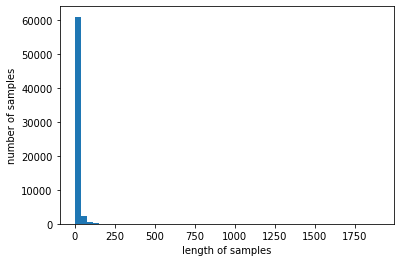

In [50]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [51]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [52]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 92.29954024779865


In [53]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

# LSTM 으로 악플 분류

In [68]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [69]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

In [70]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_v3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [71]:
import tensorflow as tf

In [81]:
import datetime
# 학습데이터의 log를 저장할 폴더 생성 (지정)
log_dir = "./tb_logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# 텐서보드 콜백 정의 하기
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [84]:
pip install keras_self_attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.46.0-cp36-none-any.whl size=17278 sha256=91607a83c4fb8035ea4eb3d301126ade6a1befe0e50f87fff1a801f9d535ac3f
  Stored in directory: /root/.cache/pip/wheels/d2/2e/80/fec4c05eb23c8e13b790e26d207d6e0ffe8013fad8c6bdd4d2
Successfully built keras-self-attention


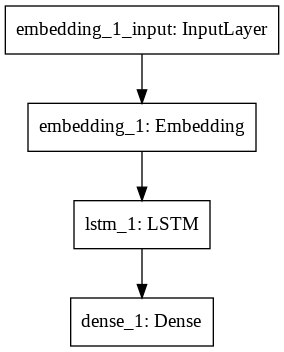

In [90]:
from keras.utils import plot_model


from keras.models import load_model
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='./model.png')

In [82]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
855/856 [============================>.] - ETA: 0s - loss: 0.0328 - acc: 0.9904 - recall_3: 0.9902 - precision_3: 0.9908
Epoch 00001: val_acc did not improve from 0.96400
856/856 [==============================] - 20s 23ms/step - loss: 0.0328 - acc: 0.9905 - recall_3: 0.9902 - precision_3: 0.9908 - val_loss: 0.1570 - val_acc: 0.9610 - val_recall_3: 0.9606 - val_precision_3: 0.9618
Epoch 2/15
856/856 [==============================] - ETA: 0s - loss: 0.0293 - acc: 0.9918 - recall_3: 0.9915 - precision_3: 0.9920
Epoch 00002: val_acc did not improve from 0.96400
856/856 [==============================] - 19s 22ms/step - loss: 0.0293 - acc: 0.9918 - recall_3: 0.9915 - precision_3: 0.9920 - val_loss: 0.1674 - val_acc: 0.9575 - val_recall_3: 0.9568 - val_precision_3: 0.9582
Epoch 3/15
855/856 [============================>.] - ETA: 0s - loss: 0.0280 - acc: 0.9920 - recall_3: 0.9917 - precision_3: 0.9922

KeyboardInterrupt: ignored

In [60]:
X_test[:5]
y_test[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [61]:
loaded_model = load_model('best_model_v3.h5')
loaded_model.evaluate(X_test,np.array(y_test))

866/866 [==============================] - 7s 8ms/step - loss: 0.1566 - acc: 0.9538 - recall: 0.9530 - precision: 0.9544


[0.15664803981781006,
 0.9538167119026184,
 0.953022301197052,
 0.9544008374214172]

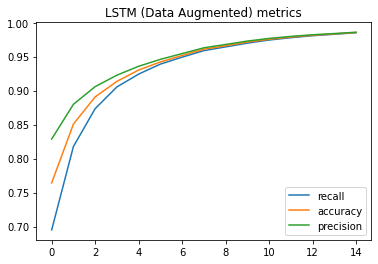

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['recall'], label = 'recall')
plt.plot(history.history['acc'], label = 'accuracy')
plt.plot(history.history['precision'], label = 'precision')
plt.legend(['recall','accuracy','precision'])
plt.title('LSTM (Data Augmented) metrics')
plt.show()

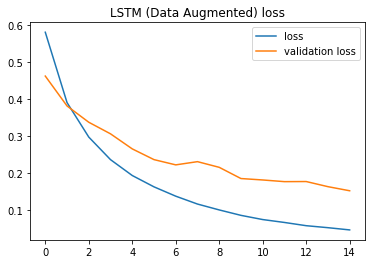

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'validation loss'])
plt.title('LSTM (Data Augmented) loss')
plt.show()

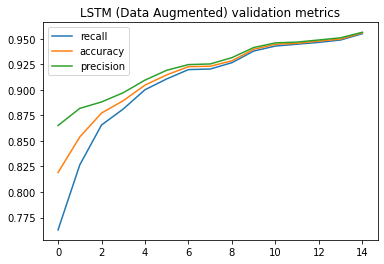

In [64]:
plt.plot(history.history['val_recall'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['val_precision'])
plt.legend(['recall','accuracy','precision'])
plt.title('LSTM (Data Augmented) validation metrics')
plt.show()

In [ ]:
def comment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model.predict(pad_new)) # 예측
  grade = ['악플 아님', '악플 가능성', '악플']
  print(grade[ int(score.argmax(axis=1)) ])
  

In [76]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [80]:
%tensorboard --logdir {log_dir}

Output hidden; open in https://colab.research.google.com to view.